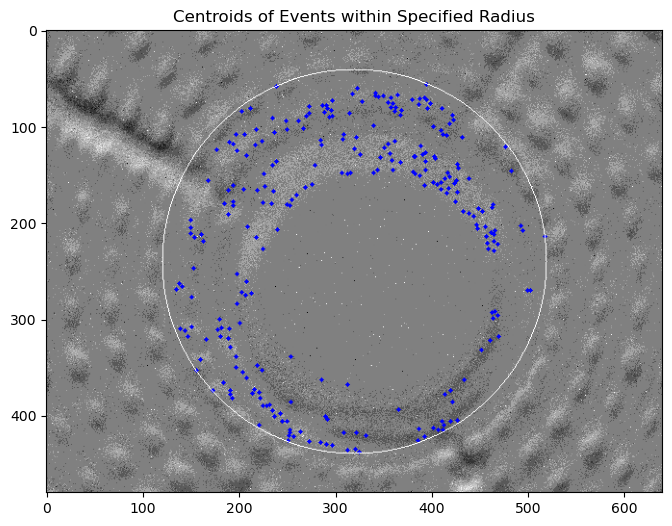

Centroids of the events within the specified radius:
(325, 438)
(321, 435)
(313, 436)
(297, 431)
(291, 430)
(285, 428)
(273, 427)
(251, 426)
(386, 426)
(393, 422)
(257, 422)
(332, 421)
(252, 421)
(253, 418)
(322, 418)
(309, 418)
(412, 415)
(407, 415)
(387, 414)
(253, 415)
(402, 413)
(413, 410)
(264, 417)
(221, 410)
(411, 406)
(427, 405)
(420, 406)
(245, 406)
(292, 404)
(250, 406)
(237, 401)
(290, 401)
(243, 398)
(366, 394)
(235, 395)
(229, 390)
(225, 390)
(232, 389)
(254, 386)
(193, 382)
(222, 382)
(414, 378)
(214, 377)
(191, 378)
(221, 376)
(420, 374)
(191, 374)
(216, 373)
(184, 366)
(434, 363)
(286, 363)
(173, 374)
(422, 386)
(208, 361)
(224, 353)
(204, 355)
(156, 353)
(219, 348)
(197, 350)
(254, 339)
(197, 339)
(160, 342)
(452, 332)
(461, 322)
(166, 321)
(191, 329)
(470, 318)
(181, 318)
(189, 320)
(147, 318)
(178, 311)
(144, 312)
(190, 310)
(139, 310)
(182, 309)
(201, 304)
(151, 308)
(180, 300)
(464, 299)
(469, 296)
(463, 293)
(466, 292)
(198, 284)
(151, 277)
(313, 368)
(207, 275)
(

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/Users/winirrr/Documents/EventBased_Project/datasets/dif_duration_dataset_1/11ms/no_press/dvSave-2024_06_25_15_33_29_frame_10.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if image is None:
    raise ValueError(f"Image not found or unable to load: {image_path}")

# Threshold the image to create a binary image (white for positive events, black for negative events)
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate centroids for each contour
centroids = []
for contour in contours:
    M = cv2.moments(contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        centroids.append((cx, cy))

# Get image dimensions and calculate the center
height, width = image.shape
center_x, center_y = width // 2, height // 2

# Define the radius
radius = 200  # Adjust this value as needed

# Filter centroids based on the specified radius
filtered_centroids = [c for c in centroids if np.sqrt((c[0] - center_x)**2 + (c[1] - center_y)**2) <= radius]

# Plot the centroids on the image
centroid_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for centroid in filtered_centroids:
    cv2.circle(centroid_image, centroid, 2, (0, 0, 255), -1)  # Red color for centroids

# Draw the radius circle
cv2.circle(centroid_image, (center_x, center_y), radius, (255, 255, 255), 1)

# Display the original image with centroids
plt.figure(figsize=(10, 6))
plt.imshow(centroid_image)
plt.title('Centroids of Events within Specified Radius')
plt.show()

# Print centroids for verification
print("Centroids of the events within the specified radius:")
for centroid in filtered_centroids:
    print(centroid)


In [3]:
len(centroids)

736

In [ ]:
for 